<a href="https://colab.research.google.com/github/Moorboor/Guardian_Angles/blob/main/DataAnalysisGuardianAngles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: Guardian Angles



---



In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1B7tr455q_nTPTClWozHvWbQNUg2NA1H0/preview" width="800" height="280" allow="autoplay"></iframe>

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1UYT-836HdB-Sd-ILPrNHh9NKF9uA7T21/preview" width="260" height="180" allow="autoplay"></iframe>

### Imports

This notebook will access the authors google drive folder and loads directly a csv file of the [Post-Questionnaire](https://docs.google.com/forms/d/12StDXzaLpfierKAv4SSunVCYpcpRW2T8sIynlDwiBu8/edit?usp=sharing)

In [ ]:
import os
from google.colab import drive

## Introduction

In this notebook we will analyze the results of our post-experiment questionnaire and of the measurements that we took while the participant ran the experiment **using the programming language R.** 

### Defining terms/ Additional information

To use R in Colab we have to load the extension. 

In [ ]:
%load_ext rpy2.ipython

Now when we write '%%R' on top of a cell it will function as an R magic cell. The cell will work like a normal R Studio cell. 

Any other cell will stay a regular python cell. 

See below that we can load the tidyverse in that fashion.

In [ ]:
%%R
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Loading Data

Loading the answers of the [Post-Questionnaire](https://docs.google.com/forms/d/12StDXzaLpfierKAv4SSunVCYpcpRW2T8sIynlDwiBu8/edit?usp=sharing) from google drive. The file is in format of a csv file because it was simplier to read it when using R.

In [ ]:
drive.mount(mountpoint = '/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Uni/Guardian_Angles_2021')
os.getcwd()

'/content/drive/MyDrive/Uni/Guardian_Angles_2021'

In [ ]:
%%R
data <- read.csv('HRI_Questionnaire_(Antworten).csv')
data <- data[!(is.na(data$Please.enter.your.participant.number.)),]

glimpse(data)

Rows: 21
Columns: 15
$ X                                                                                                                                  <chr> …
$ But.first..Please.enter.your.participant.number.                                                                                   <int> …
$ How.stressful.was.the.situation.for.you.                                                                                           <int> …
$ X.I.trusted.the.drone.in.the.simulation..                                                                                          <int> …
$ X.I.felt.comforted.by.the.drone.in.the.simulation..                                                                                <int> …
$ X.The.drone.increased.my.chances.of.survival.in.the.simulation..                                                                   <int> …
$ X.I.believe.that.I.could.feel.trust.towards.a.human.in.a.distressing.situation..                                                   

We need to read in the ids to monologue mapping.

In [ ]:
%%R
ids <- read_delim('Data.txt', delim = ',', col_names=FALSE) %>%
  separate(col = X2,
           into = str_c('val',1:2),
           sep = ':',
           convert = T) %>%
  select(- val1) %>%
  rename(subject_id = X1, 
         time = val2, 
         drone_turns = X3, 
         drone_monologue = X4)

ids$drone_turns <- as.integer(ids$drone_turns)


knitr::kable(
    ids,
    caption = 'Subject trail data',
    booktabs = TRUE
)

Rows: 21 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): X2, X3, X4
dbl (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Table: Subject trail data

| subject_id|      time| drone_turns|drone_monologue |
|----------:|---------:|-----------:|:---------------|
|          1| 271.72780|          12|DM1             |
|          2| 126.08900|           8|DM2             |
|          3| 161.04000|           0|DM3             |
|          4|  90.32468|           3|DM1             |
|          5| 103.91950|           4|DM3             |
|          6| 120.98840|           2|DM1             |
|          7| 199.60040|           7|DM3             |
|          8|  89.54372|           9|DM3             |
|          9| 154.59300|           4|DM2             |
|         10| 141.54860|           9|DM2             |
|       

### Data wrangling

As can be seen above is the dataframe raw but very close to the definition of being a tidy dataset. What is missing is the following:

We need to define some meta variables which describes the participants received stress in the experiment. Through a "Stress" variable which we should gain through some questions of the questionnaire we could view them in relation to the according 3 groups. The different drone monologues D1, D2, D3. 

In [ ]:
%%R
q1 <- data$How.stressful.was.the.situation.for.you.[!is.na(data$How.stressful.was.the.situation.for.you.)] 

mean_q1 <- mean(q1)
cat(paste('Grande Mean of Question 2: How stressful was it for you? \n\nMean:', round(mean_q1,1)))

Grande Mean of Question 2: How stressful was it for you? 

Mean: 2.5

Joining together the two datasets

In [ ]:
%%R
data_prep <- data %>%
  rename(subject_id = Please.enter.your.participant.number.) %>%
  select(3:15)

data_prep$subject_id[as.integer(data_prep$subject_id)]

data_full <- full_join(data_prep, ids, by = 'subject_id')

We decided to exclude participant no. 7, no. 3 due to walking off the intended map by technical issues.

In [ ]:
%%R
data_full <- data_full %>%
  filter(subject_id != 7) %>%
  filter(subject_id != 3)

glimpse(data_full)

Rows: 19
Columns: 16
$ How.stressful.was.the.situation.for.you.                                                                                           <int> …
$ X.I.trusted.the.drone.in.the.simulation..                                                                                          <int> …
$ X.I.felt.comforted.by.the.drone.in.the.simulation..                                                                                <int> …
$ X.The.drone.increased.my.chances.of.survival.in.the.simulation..                                                                   <int> …
$ X.I.believe.that.I.could.feel.trust.towards.a.human.in.a.distressing.situation..                                                   <int> …
$ X.I.believe.that.a.human.could.comfort.me.in.a.dangerous.or.distressing.situation..                                                <int> …
$ X.I.believe.that.being.aided.by.a.human.could.substantially.increase.my.chances.of.survival.in.a.dangerous.situation..             

### Graphical analysis

General analysis over the distribution of age and gender of our participants.

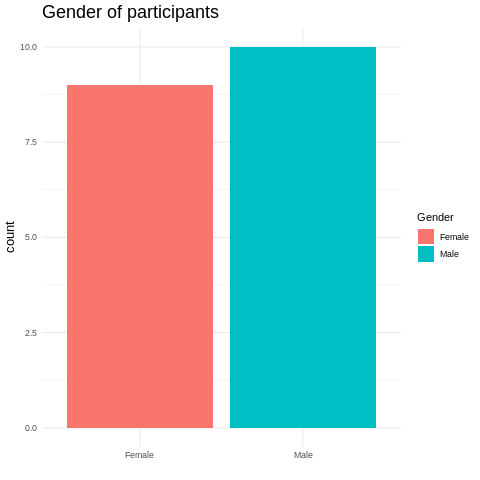

In [ ]:
%%R
data_full %>%
  dplyr::count(Gender) %>%
  ggplot(aes(x = Gender, y = n))+
    geom_col(aes(fill = Gender)) + 
    theme_minimal() +
    labs(title = 'Gender of participants',
         x = '', 
         y = 'count') +
    theme(plot.title = element_text(size = 18),
          axis.title = element_text(size = 13))

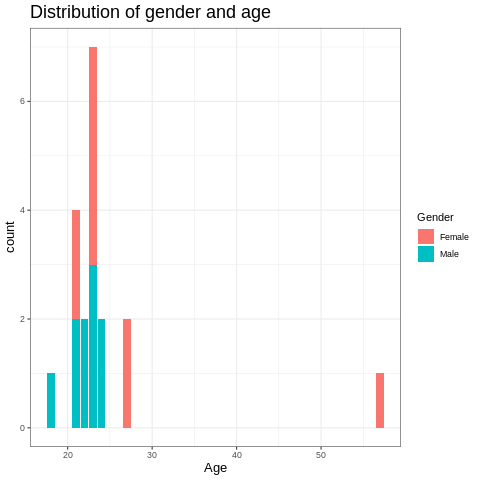

In [ ]:
%%R
data_full %>%
  ggplot(aes(x=Age, fill=Gender))+
  geom_bar() +
  theme_bw() +
  labs(title = 'Distribution of gender and age',
       y = 'count') + 
  theme(plot.title = element_text(size = 18),
        axis.title = element_text(size = 13))

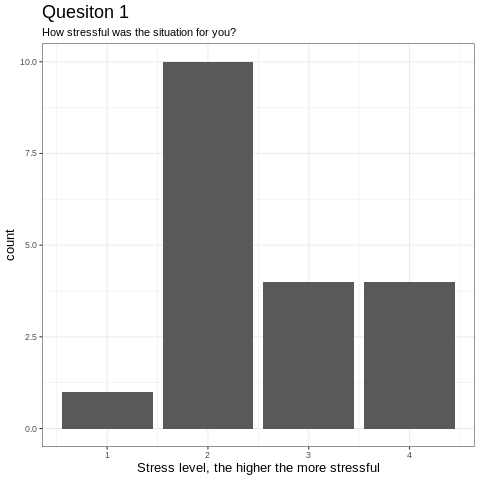

In [ ]:
%%R
data_full %>% 
  count(How.stressful.was.the.situation.for.you.) %>%

  ggplot(aes(x = How.stressful.was.the.situation.for.you., y = n)) + 
  geom_col() + 
  theme_bw() +
  labs(title = 'Quesiton 1',
       subtitle = 'How stressful was the situation for you?',
       x = 'Stress level, the higher the more stressful',
       y = 'count') + 
  theme(plot.title = element_text(size = 18),
        axis.title = element_text(size = 13))

Now in relation to the drone monologues

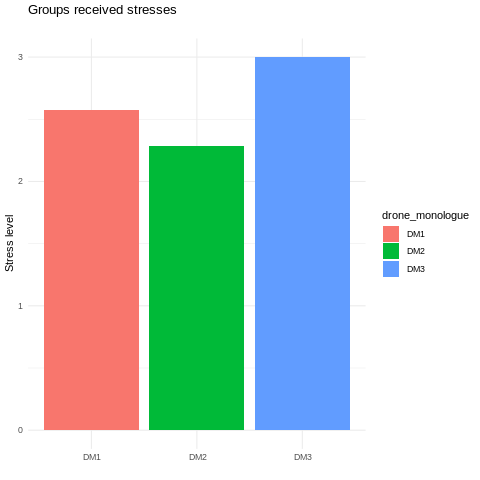

In [ ]:
%%R
data_full %>%
  group_by(drone_monologue) %>%
  summarise(drone_turns = mean(drone_turns),
            passed_time = mean(time), 
            Q1 = mean(How.stressful.was.the.situation.for.you.),
            Age = mean(Age)
            ) %>%

  ggplot() +
    geom_col(aes(x = drone_monologue, y = Q1, fill = drone_monologue)) +
    labs(title = 'Groups received stresses',
         subtitle = '',
         x = '',
         y = 'Stress level') +
    theme(axis.title = element_text(size = 15),
          plot.title = element_text(size = 20),
          axis.text.x = element_text(size = 20)) +
    theme_minimal()

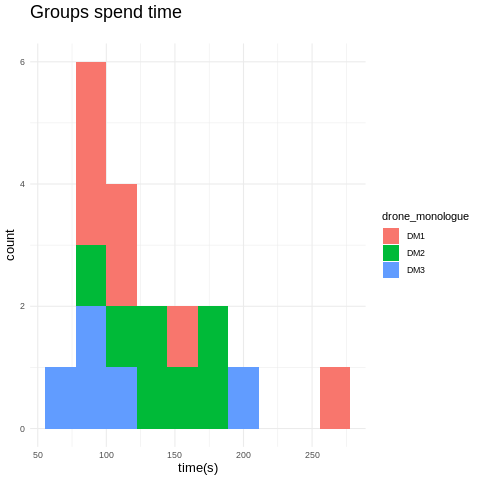

In [ ]:
%%R
data_full %>%
  ggplot(aes(x = time, fill = drone_monologue)) +
  geom_histogram(bins = 10) +
  theme_minimal() + 
  labs(title = 'Groups spend time',
       subtitle = '',
       x = 'time(s)') +
  theme(plot.title = element_text(size = 18),
        axis.title = element_text(size = 13))

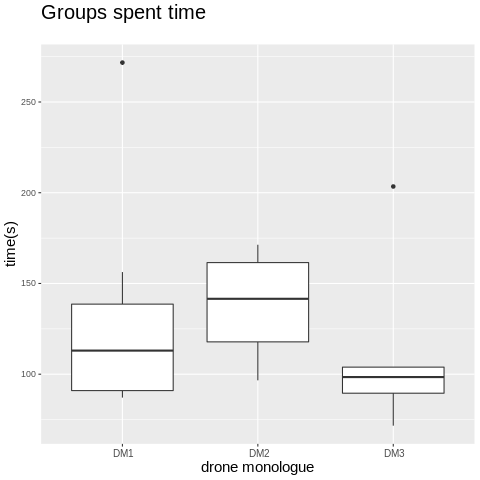

In [ ]:
%%R
data_full %>%
  ggplot(aes(x = drone_monologue, y = time)) +
  geom_boxplot() +
  labs(title = 'Groups spent time',
       subtitle = '',
       x = 'drone monologue',
       y = 'time(s)') +
  theme(plot.title = element_text(size = 20),
        axis.text.x = element_text(size = 10),
        axis.title = element_text(size = 15))

## Analysis with one-way ANOVA

###Question 2: How stressful was the situation for you?



In [ ]:
%%R
data_full_anova_Q1 <- data_full %>%
  select(How.stressful.was.the.situation.for.you., drone_monologue) %>%
  rename(Q1 = How.stressful.was.the.situation.for.you.) %>% 
  as_tibble()

aov(formula = Q1 ~ drone_monologue, data_full_anova_Q1) %>% summary()

                Df Sum Sq Mean Sq F value Pr(>F)
drone_monologue  2  1.489  0.7444   0.906  0.424
Residuals       16 13.143  0.8214               


Based on a one-way ANOVA, we find evidence for the assumption of equal means across all groups (F(2, 17) ≈ 0.906, p ≈ 0.424).

###Question 4: The drone increased my chances of survival in the simulation?

In [ ]:
%%R
data_full_anova_Q4 <- data_full %>%
  select(X.The.drone.increased.my.chances.of.survival.in.the.simulation.., drone_monologue) %>%
  rename(Q4 = X.The.drone.increased.my.chances.of.survival.in.the.simulation..) %>% 
  as_tibble()

aov(formula = Q4 ~ drone_monologue, data_full_anova_Q4) %>% summary()

                Df Sum Sq Mean Sq F value Pr(>F)
drone_monologue  2  1.462  0.7308   0.544  0.591
Residuals       16 21.486  1.3429               


Based on a one-way ANOVA, we find evidence for the assumption of equal means across all groups (F(2, 17) ≈ 0.544, p ≈ 0.591).

###Question 2: I trusted the drone in the simulation?

In [ ]:
%%R
data_full_anova_Q2 <- data_full %>%
  select(X.I.trusted.the.drone.in.the.simulation.., drone_monologue) %>%
  rename(Q2 = X.I.trusted.the.drone.in.the.simulation..) %>% 
  as_tibble()

aov(formula = Q2 ~ drone_monologue, data_full_anova_Q2) %>% summary()

                Df Sum Sq Mean Sq F value Pr(>F)
drone_monologue  2  0.198  0.0992   0.081  0.922
Residuals       16 19.486  1.2179               


Based on a one-way ANOVA, we find evidence for the assumption of equal means across all groups (F(2, 17) ≈ 0.081, p ≈ 0.922).

### Question 13: I would prefer a human over robot with a communication channel to a human to assist me in a dangerous or distressing situation?

In [ ]:
%%R
data_full_anova_Q13 <- data_full %>%
  select(X.I.would.prefer.a.human.over.robot.with.a.communication.channel.to.a.human.to.assist.me.in.a.dangerous.or.distressing.situation.., drone_monologue) %>%
  rename(Q13 = X.I.would.prefer.a.human.over.robot.with.a.communication.channel.to.a.human.to.assist.me.in.a.dangerous.or.distressing.situation..) %>% 
  as_tibble()

aov(formula = Q13 ~ drone_monologue, data_full_anova_Q13) %>% summary()

                Df Sum Sq Mean Sq F value Pr(>F)
drone_monologue  2  1.913  0.9564   0.703   0.51
Residuals       16 21.771  1.3607               


Based on a one-way ANOVA, we find evidence for the assumption of equal means across all groups (F(2,17) ≈ 0.703, p ≈ 0.51). 

###Question 14: I would prefer a human over robot with a communication channel to a human to assist me in a dangerous or distressing situation?

In [ ]:
%%R
data_full_anova_Q14 <- data_full %>%
  select(X.I.would.prefer.a.human.over.robot.with.a.communication.channel.to.a.human.to.assist.me.in.a.dangerous.or.distressing.situation.., drone_monologue) %>%
  rename(Q14 = X.I.would.prefer.a.human.over.robot.with.a.communication.channel.to.a.human.to.assist.me.in.a.dangerous.or.distressing.situation..) %>% 
  as_tibble()

aov(formula = Q14 ~ drone_monologue, data_full_anova_Q14) %>% summary()

                Df Sum Sq Mean Sq F value Pr(>F)
drone_monologue  2  1.913  0.9564   0.703   0.51
Residuals       16 21.771  1.3607               


Based on a one-way ANOVA, we find evidence for the assumption of equal means across all groups (F(2, 17) ≈ 0.703, p ≈ 0.51).

### Time measurement 

In [ ]:
%%R
data_full_time <- data_full %>%
  select(time, drone_monologue) %>%
  as_tibble()
aov(formula = time ~ drone_monologue, data_full_time) %>% summary()

                Df Sum Sq Mean Sq F value Pr(>F)
drone_monologue  2   1925   962.6   0.369  0.697
Residuals       16  41694  2605.8               


Based on a one-way ANOVA, we find evidence for the assumption of equal means across all groups (F(2, 17) ≈ 0.369, p ≈ 0.697).

### Drone Turns

In [ ]:
%%R
data_full_turns <- data_full %>%
  select(drone_turns, drone_monologue) %>%
  as_tibble()
aov(formula = drone_turns ~ drone_monologue, data_full_turns) %>% summary()

                Df Sum Sq Mean Sq F value Pr(>F)
drone_monologue  2  33.15   16.58   1.127  0.348
Residuals       16 235.37   14.71               


Based on a one-way ANOVA, we find evidence for the assumption of equal means across all groups (F(2, 17) ≈ 1.127, p ≈ 0.348).



---



## About this Notebook

This notebook was writen by Maik van Do.